<a href="https://colab.research.google.com/github/lucianosilvacraam/astro/blob/master/Antroinform%C3%A1tica_II_Aula_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

APRENDIZADO SUPERVISIONADO

**TEORIA**

In [1]:
import numpy as np
X = np.array([[1, 1], [0, 0]])
y = np.array([1,0])
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
clf.predict([[0,0]])


array([0])

In [0]:
clf.predict([[1,1]])


array([1])

In [0]:
clf.predict([[4,4]])

array([1])

**PRÁTICA**

In [0]:
!pip install astroml

     |████████████████████████████████| 112kB 2.7MB/s 
  Created wheel for astroml: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=37c4265e48170b5b6634067e5de0dd2c9aefab5b2028467b55af9c07f9f6e632
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroml


querying for 50000 objects
SELECT TOP 50000
  p.u, p.g, p.r, p.i, p.z, s.class, s.z, s.zerr
FROM PhotoObj AS p
  JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE 
  p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 20
  AND s.class <> 'UNKNOWN'
  AND s.class <> 'STAR'
  AND s.class <> 'SKY'
  AND s.class <> 'STAR_LATE'
finished.


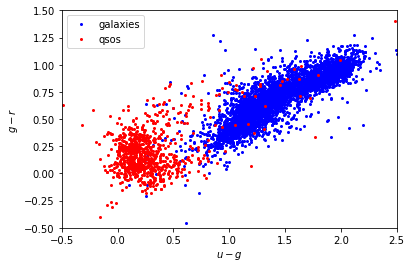

In [0]:
from matplotlib import pyplot as plt

from astroML.datasets import fetch_sdss_galaxy_colors

#------------------------------------------------------------
# Download data
data = fetch_sdss_galaxy_colors()
data = data[::10]  # truncate for plotting

# Extract colors and spectral class
ug = data['u'] - data['g']
gr = data['g'] - data['r']
spec_class = data['specClass']

galaxies = (spec_class == 'GALAXY')
qsos = (spec_class == 'QSO')

#------------------------------------------------------------
# Prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)

ax.plot(ug[galaxies], gr[galaxies], '.', ms=4, c='b', label='galaxies')
ax.plot(ug[qsos], gr[qsos], '.', ms=4, c='r', label='qsos')

ax.legend(loc=2)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

plt.show()